# Bike sharing (Multiple Linear Regression) Assignment 

## Problem Statement



 - This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. 
 
 
 - A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
 


- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 



- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.



### Business Objective

 - Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Business Goal

- We are required to model the demand for shared bikes with the available independent variables. 
- It will be used by the management to understand how exactly the demands vary with different features. 
- They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
# import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
# print non null count and data types of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# print statistical summary of the dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# check null count of the data
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


- Data is clean as there are no null values

In [8]:
# drop duplicate values if present in the dataset
df.drop_duplicates().shape

(730, 16)

### Cleaning the data 

In [9]:
# drop the dteday and instant columns as they are not required
df.drop(["instant" , "dteday"] , axis = 1 , inplace = True)

In [10]:
# drop the holiday column as its opposite working day column is also present in the dataset
df.drop(["holiday"],axis = 1 , inplace = True)

In [11]:
# drop the casual and registered columns as we have count columns which represents sum of that both columns
df.drop(["casual" , "registered"] , axis = 1 , inplace = True)

In [12]:
# check the columns are dropped or not
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# Rename the columns for better readibility

df.rename(columns = {"season":"Season" , "yr":"Year","mnth":"Month", "weekday":"Week_day",
                     "workingday":"Working_day" , "weathersit":"Weather_Situation" , "temp":"Temp",
                    "atemp":"Temp_feel" , "hum": "Humidity" ,"windspeed":"Wind_speed" ,
                     "cnt":"Count"}, inplace = True)

In [14]:
# now check name of columns has changed or not
df.head()

,Season,Year,Month,Week_day,Working_day,Weather_Situation,Temp,Temp_feel,Humidity,Wind_speed,Count
0,1,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# change the data types of categorical columns
df["Season"] = df["Season"].astype("object")
df["Month"] = df["Month"].astype("object")
df["Week_day"] = df["Week_day"].astype("object")
df["Weather_Situation"] = df["Weather_Situation"].astype("object")

In [16]:
# now check the data types changed or not
df.dtypes

Season                object
Year                   int64
Month                 object
Week_day              object
Working_day            int64
Weather_Situation     object
Temp                 float64
Temp_feel            float64
Humidity             float64
Wind_speed           float64
Count                  int64
dtype: object

In [17]:
# replace the values of season with categorical values given in the data dict
df.Season = df.Season.replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"})

In [18]:
df.Season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: Season, dtype: int64

In [19]:
# replace the values of month with month names
df.Month = df.Month.replace({1:"Jan" , 2:"Feb" , 3:"March" , 4:"April" , 5:"May" , 6:"June",
                             7:"July" , 8:"August" , 9:"Sept" , 10:"Oct" , 11:"Nov" , 12 :"Dec"})

In [20]:
# check value counts
df.Month.value_counts()

Jan       62
March     62
May       62
July      62
August    62
Oct       62
Dec       62
April     60
June      60
Sept      60
Nov       60
Feb       56
Name: Month, dtype: int64

In [21]:
# replace the values of Week_day with Week day names
df.Week_day = df.Week_day.replace({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"})

In [22]:
# check value counts
df.Week_day.value_counts()

Tue    105
Wed    105
Thu    104
Fri    104
Sat    104
Sun    104
Mon    104
Name: Week_day, dtype: int64

In [23]:
# replace the values of weather situation with given terms
df.Weather_Situation = df.Weather_Situation.replace({1:"Clear" , 2:"Mist" , 3:"Light Snow" , 4:"Heavy Rain"})

In [24]:
# check value counts
df.Weather_Situation.value_counts()

Clear         463
Mist          246
Light Snow     21
Name: Weather_Situation, dtype: int64

In [25]:
# replace the values year with 2018 and 2019
df.Year = df.Year.replace({0:"2018" , 1:"2019"})

In [26]:
# check value counts
df.Year.value_counts()

2018    365
2019    365
Name: Year, dtype: int64

In [27]:
#replace the values of Working_day column with working day and holiday
df.Working_day = df.Working_day.replace({1:"working day" , 0:"holiday"})

In [28]:
# check value counts
df.Working_day.value_counts()

working day    504
holiday        226
Name: Working_day, dtype: int64

## Visualising the data

For visualising the data we have to import the libraries

In [29]:
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

Make a pairplot for all numerical variables in the dataframe

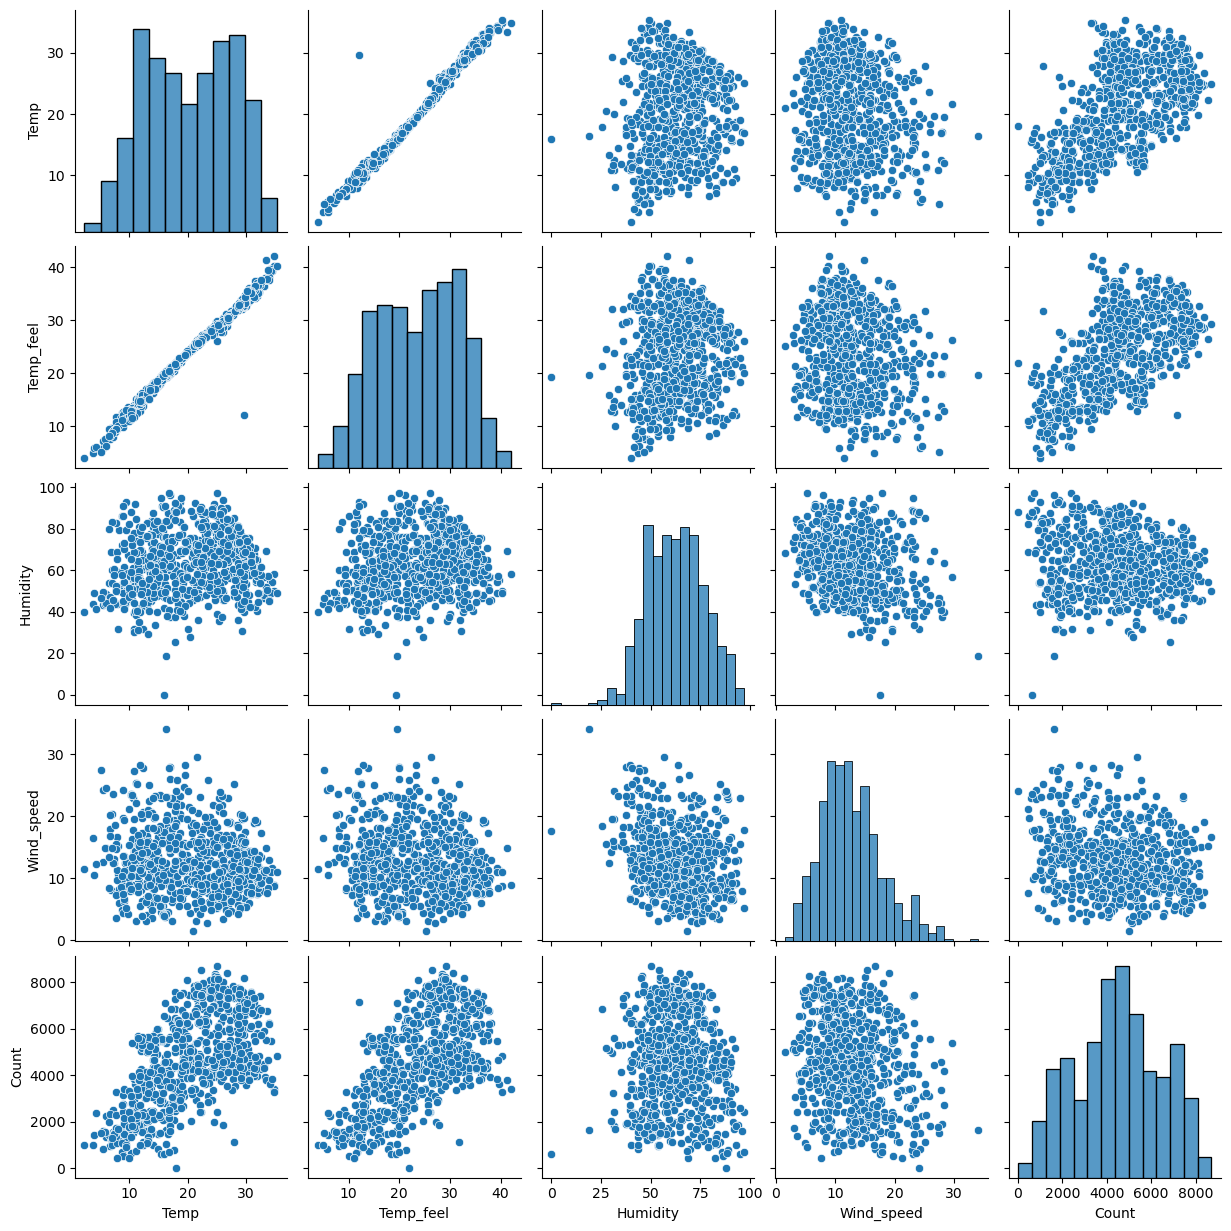

In [30]:
# make pairplot for numeric variables in the dataframe
sns.pairplot(df)
plt.show()

We can see here Temp and Temp_feel are highly correlated so can drop the Temp_feel column

In [31]:
# drop the Temp_feel column
df.drop(["Temp_feel"] , axis = 1 , inplace = True)

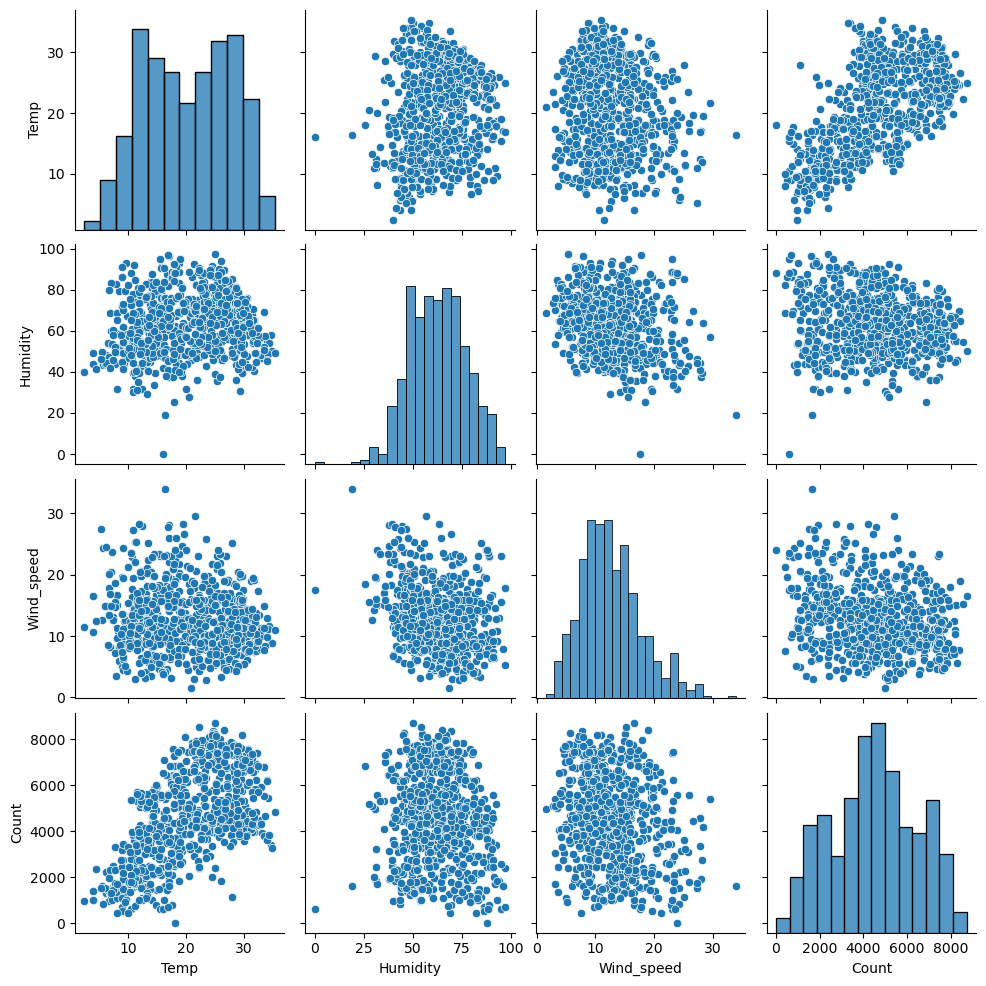

In [32]:
# make pairplot for numeric variables in the dataframe
sns.pairplot(df)
plt.show()

Now we can consider the remaining plotted numerical variables for model building as they are correlated with target variable Count

In [33]:
df.head()

,Season,Year,Month,Week_day,Working_day,Weather_Situation,Temp,Humidity,Wind_speed,Count
0,spring,2018,Jan,Tue,working day,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,Wed,working day,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,Thu,working day,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,Fri,working day,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,Sat,working day,Clear,9.305237,43.6957,12.522300,1600


### Visualising categorical columns

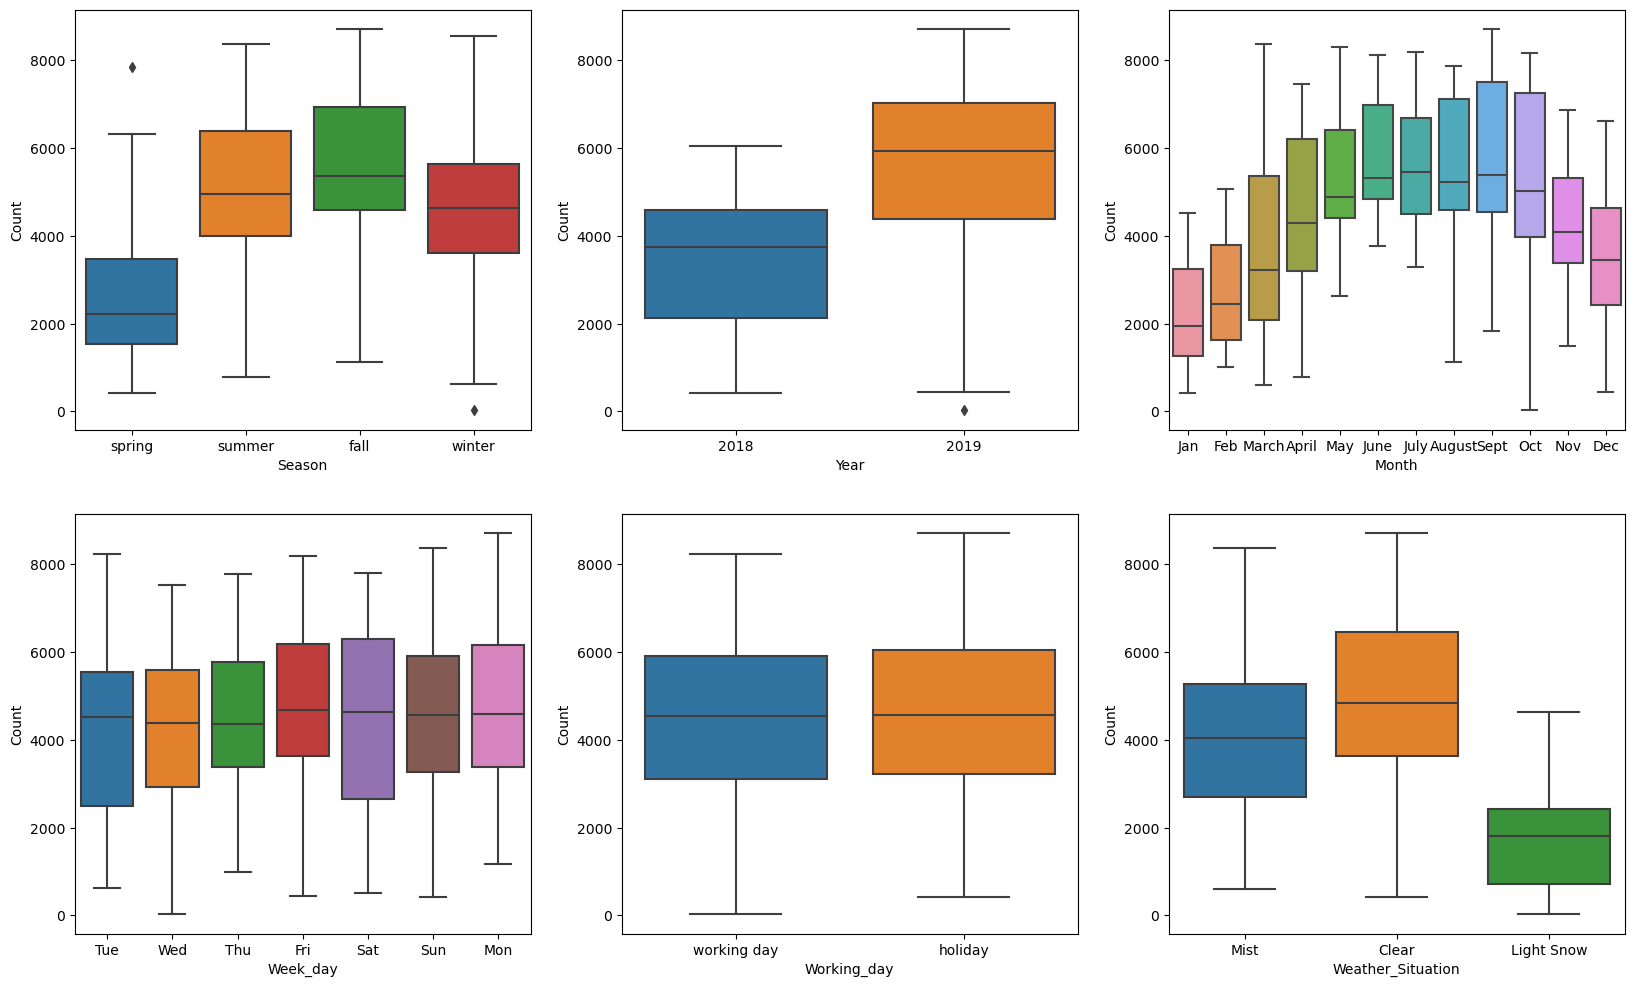

In [34]:
# make a boxplot for the categorical columns of the dataframe
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Season', y = 'Count', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'Year', y = 'Count', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'Month', y = 'Count', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'Week_day', y = 'Count', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'Working_day', y = 'Count', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'Weather_Situation', y = 'Count', data = df)
plt.show()

Demand for bikes observed high in : Season_fall , year_2019 , month_sept , week_day_mon and sun , Holiday , and in clear_weather_situation.

### Dummy variables 

In [35]:
# Get the dummy variables for categorical data and store it into new variable
dummy_df = pd.get_dummies(df[["Season" ,"Year" , "Month" ,"Week_day" ,"Working_day" , "Weather_Situation"]])

In [36]:
dummy_df.head()

,Season_fall,Season_spring,Season_summer,Season_winter,Year_2018,Year_2019,Month_April,Month_August,Month_Dec,Month_Feb,...,Week_day_Sat,Week_day_Sun,Week_day_Thu,Week_day_Tue,Week_day_Wed,Working_day_holiday,Working_day_working day,Weather_Situation_Clear,Weather_Situation_Light Snow,Weather_Situation_Mist
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0



- we don't need all 30 columns because they are interrelated and interpreting the same information so we can frop the first columns from the variables

In [37]:
# Let's drop the first column from dummy_df using 'drop_first = True'

dummy_df = pd.get_dummies(df[["Season" ,"Year" , "Month" ,"Week_day" ,"Working_day" , "Weather_Situation"]] , drop_first = True)

In [38]:
# let's see the first columns are dropped or not
dummy_df.head()

,Season_spring,Season_summer,Season_winter,Year_2019,Month_August,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,...,Month_Sept,Week_day_Mon,Week_day_Sat,Week_day_Sun,Week_day_Thu,Week_day_Tue,Week_day_Wed,Working_day_working day,Weather_Situation_Light Snow,Weather_Situation_Mist
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [39]:
# add results to the original dataframe df

df = pd.concat([df , dummy_df] , axis = 1)

In [40]:
df.head()

,Season,Year,Month,Week_day,Working_day,Weather_Situation,Temp,Humidity,Wind_speed,Count,...,Month_Sept,Week_day_Mon,Week_day_Sat,Week_day_Sun,Week_day_Thu,Week_day_Tue,Week_day_Wed,Working_day_working day,Weather_Situation_Light Snow,Weather_Situation_Mist
0,spring,2018,Jan,Tue,working day,Mist,14.110847,80.5833,10.749882,985,...,0,0,0,0,0,1,0,1,0,1
1,spring,2018,Jan,Wed,working day,Mist,14.902598,69.6087,16.652113,801,...,0,0,0,0,0,0,1,1,0,1
2,spring,2018,Jan,Thu,working day,Clear,8.050924,43.7273,16.636703,1349,...,0,0,0,0,1,0,0,1,0,0
3,spring,2018,Jan,Fri,working day,Clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,Sat,working day,Clear,9.305237,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,1,0,0


In [41]:
# Drop the variables as we have created the dummies for it

df.drop(["Season" ,"Year" ,  "Month" , "Week_day" , "Working_day" ,"Weather_Situation" ] , axis = 1 , inplace = True)

In [42]:
df.head()

,Temp,Humidity,Wind_speed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_August,Month_Dec,...,Month_Sept,Week_day_Mon,Week_day_Sat,Week_day_Sun,Week_day_Thu,Week_day_Tue,Week_day_Wed,Working_day_working day,Weather_Situation_Light Snow,Weather_Situation_Mist
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


### Splitting  the data into Training and Testing sets

In [43]:
# import libraries
from sklearn.model_selection import train_test_split

In [44]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train , df_test = train_test_split(df , train_size = 0.7 , test_size = 0.3 , random_state = 100)

In [45]:
# check shape of train data
df_train.shape

(510, 28)

In [46]:
# check shape of test data
df_test.shape

(219, 28)

### Rescaling the features

- Use MinMax scaling

In [47]:
# import requiring libraries
from sklearn.preprocessing import MinMaxScaler

In [48]:
# define scaler
scaler = MinMaxScaler()

In [49]:
# apply scaler to all variables except dummy variables
num_vars = ["Temp" , "Humidity" , "Wind_speed" , "Count"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [50]:
df_train.head()

,Temp,Humidity,Wind_speed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_August,Month_Dec,...,Month_Sept,Week_day_Mon,Week_day_Sat,Week_day_Sun,Week_day_Thu,Week_day_Tue,Week_day_Wed,Working_day_working day,Weather_Situation_Light Snow,Weather_Situation_Mist
653,0.509887,0.575354,0.300794,0.864243,0,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
576,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
426,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [51]:
df_train.describe()

,Temp,Humidity,Wind_speed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_August,Month_Dec,...,Month_Sept,Week_day_Mon,Week_day_Sat,Week_day_Sun,Week_day_Thu,Week_day_Tue,Week_day_Wed,Working_day_working day,Weather_Situation_Light Snow,Weather_Situation_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.096078,0.084314,...,0.080392,0.137255,0.147059,0.129412,0.135294,0.154902,0.152941,0.711765,0.029412,0.343137
std,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.294988,0.278131,...,0.272166,0.344454,0.354512,0.335985,0.342373,0.362166,0.360284,0.453386,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
# see correlation between variables of train data
df_train.corr()

,Temp,Humidity,Wind_speed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_August,Month_Dec,...,Month_Sept,Week_day_Mon,Week_day_Sat,Week_day_Sun,Week_day_Thu,Week_day_Tue,Week_day_Wed,Working_day_working day,Weather_Situation_Light Snow,Weather_Situation_Mist
Temp,1.000000,0.155415,-0.187396,0.643517,-0.605988,0.125582,-0.233697,0.107288,0.387456,-0.272869,...,0.207457,0.006854,-1.953999e-02,0.025276,-0.046291,-0.037708,-0.001951,-0.007643,-3.609266e-02,-0.090161
Humidity,0.155415,1.000000,-0.266895,-0.059993,-0.201134,-0.013216,0.171579,-0.084792,0.053185,0.057832,...,0.152628,-0.027388,5.190849e-02,0.002783,0.026395,-0.030499,0.033548,0.020701,2.450381e-01,0.481042
Wind_speed,-0.187396,-0.266895,1.000000,-0.253794,0.180743,0.110089,-0.090649,-0.001108,-0.111243,-0.060975,...,-0.121734,0.018278,2.133435e-03,-0.016284,-0.057518,0.035390,0.035616,-0.002504,8.689990e-02,-0.030385
Count,0.643517,-0.059993,-0.253794,1.000000,-0.548871,0.134343,0.032636,0.591508,0.227229,-0.143598,...,0.201327,0.031237,-4.056563e-02,0.012496,-0.019578,-0.071188,-0.018885,-0.008723,-2.265984e-01,-0.175530
Season_spring,-0.605988,-0.201134,0.180743,-0.548871,1.000000,-0.322955,-0.326377,-0.036320,-0.184784,0.041868,...,-0.167580,0.013022,3.568119e-02,-0.000641,0.002987,0.010007,-0.012251,-0.032886,-4.455809e-02,0.013970
Season_summer,0.125582,-0.013216,0.110089,0.134343,-0.322955,1.000000,-0.328116,0.013856,-0.185769,-0.172902,...,-0.168473,-0.015325,-1.779215e-02,-0.002397,-0.012151,-0.017169,-0.001490,0.030488,-4.523062e-02,0.039442
Season_winter,-0.233697,0.171579,-0.090649,0.032636,-0.326377,-0.328116,1.000000,-0.022638,-0.187737,0.314816,...,-0.020175,-0.032037,-8.660492e-03,-0.019389,0.050608,0.016635,0.045054,0.036097,1.144484e-01,0.023127
Year_2019,0.107288,-0.084792,-0.001108,0.591508,-0.036320,0.013856,-0.022638,1.000000,0.054774,-0.040049,...,0.002574,0.016537,-3.419941e-02,-0.017733,0.010995,-0.033817,0.026024,-0.003005,-6.076399e-02,-0.015469
Month_August,0.387456,0.053185,-0.111243,0.227229,-0.184784,-0.185769,-0.187737,0.054774,1.000000,-0.098929,...,-0.096395,0.005308,-3.867814e-03,0.032882,0.007209,0.007536,-0.064591,-0.012875,-5.675323e-02,0.016625
Month_Dec,-0.272869,0.057832,-0.060975,-0.143598,0.041868,-0.172902,0.314816,-0.040049,-0.098929,1.000000,...,-0.089718,0.043024,3.340398e-02,-0.011872,0.003762,0.026120,-0.011302,-0.025020,-1.105587e-02,0.018507


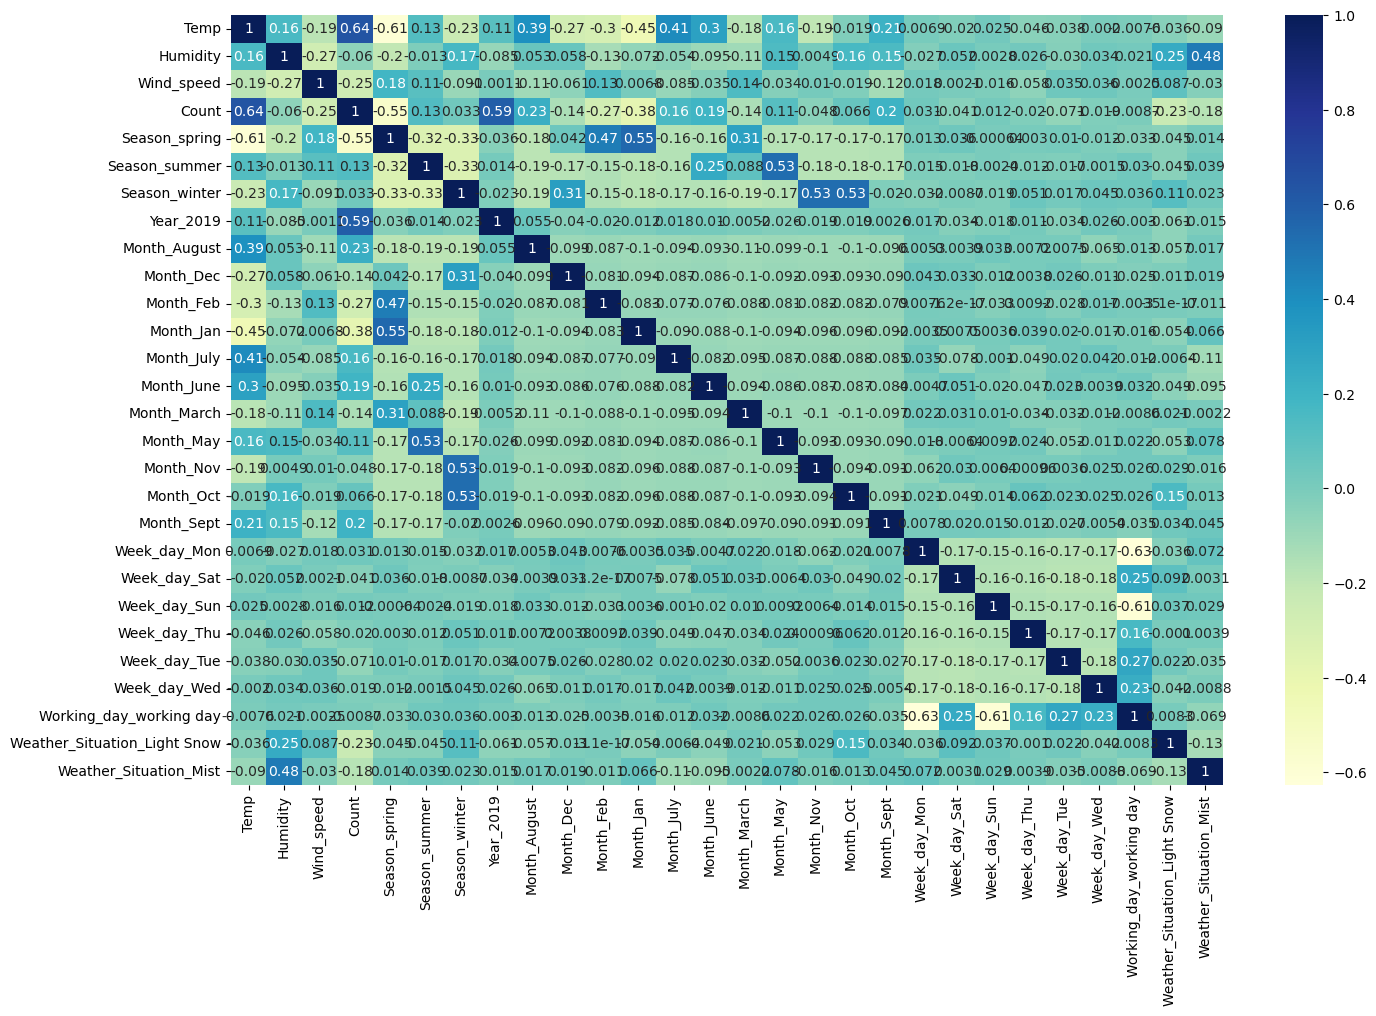

In [53]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


As we noticed Temp seems correlated with Count let's visualise them 

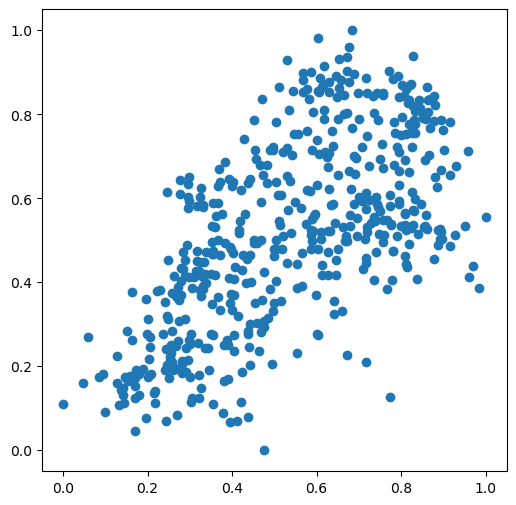

In [54]:
# plot the scatter plot of Temp vs Count
plt.figure(figsize=[6,6])
plt.scatter(df_train.Temp, df_train.Count)
plt.show()

### Dividing into X and Y sets for the model building

In [55]:
# Dividing the data into x and y for model building
X_train = df_train
y_train = df_train.pop("Count")

### Building our model

#### RFE (Recursive feature elimination)

In [56]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [57]:
# create a linear regression object
model = LinearRegression()

# create the RFE model and select 10 attributes
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

Get a list of variables whether it is chosen or not with it's ranking

In [58]:
# print list of variables which are selected with thier ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Temp', True, 1),
 ('Humidity', True, 1),
 ('Wind_speed', True, 1),
 ('Season_spring', True, 1),
 ('Season_summer', False, 5),
 ('Season_winter', False, 4),
 ('Year_2019', True, 1),
 ('Month_August', False, 13),
 ('Month_Dec', False, 8),
 ('Month_Feb', False, 9),
 ('Month_Jan', False, 6),
 ('Month_July', True, 1),
 ('Month_June', False, 17),
 ('Month_March', False, 18),
 ('Month_May', False, 10),
 ('Month_Nov', False, 7),
 ('Month_Oct', False, 15),
 ('Month_Sept', False, 3),
 ('Week_day_Mon', True, 1),
 ('Week_day_Sat', False, 16),
 ('Week_day_Sun', True, 1),
 ('Week_day_Thu', False, 14),
 ('Week_day_Tue', False, 12),
 ('Week_day_Wed', False, 11),
 ('Working_day_working day', True, 1),
 ('Weather_Situation_Light Snow', True, 1),
 ('Weather_Situation_Mist', False, 2)]

In [59]:
# print best variables with rank 1
variables = X_train.columns[rfe.support_]
variables

Index(['Temp', 'Humidity', 'Wind_speed', 'Season_spring', 'Year_2019',
       'Month_July', 'Week_day_Mon', 'Week_day_Sun', 'Working_day_working day',
       'Weather_Situation_Light Snow'],
      dtype='object')

In [60]:
# print remaining variables
X_train.columns[~rfe.support_]

Index(['Season_summer', 'Season_winter', 'Month_August', 'Month_Dec',
       'Month_Feb', 'Month_Jan', 'Month_June', 'Month_March', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sept', 'Week_day_Sat', 'Week_day_Thu',
       'Week_day_Tue', 'Week_day_Wed', 'Weather_Situation_Mist'],
      dtype='object')

### Building linear model using statsmodel

In [61]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[variables]

In [62]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [63]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [64]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.1
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          3.22e-176
Time:                        23:16:42   Log-Likelihood:                 470.03
No. Observations:                 510   AIC:                            -918.1
Df Residuals:                     499   BIC:                            -871.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [65]:
# print columns of X_train_rfe
X_train_rfe.columns

Index(['const', 'Temp', 'Humidity', 'Wind_speed', 'Season_spring', 'Year_2019',
       'Month_July', 'Week_day_Mon', 'Week_day_Sun', 'Working_day_working day',
       'Weather_Situation_Light Snow'],
      dtype='object')

Constant is not a column so we have to drop it

In [66]:
# drop the constant variable
X_train_new = X_train_rfe.drop(["const"], axis = 1)

In [67]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Humidity,17.85
8,Working_day_working day,17.38
0,Temp,11.71
2,Wind_speed,4.57
6,Week_day_Mon,4.18
7,Week_day_Sun,3.99
4,Year_2019,2.05
3,Season_spring,1.94
5,Month_July,1.35
9,Weather_Situation_Light Snow,1.12


In [68]:
# drop the variable Humidity as it have large VIF
X_train_new = X_train_new.drop(["Humidity"] , axis = 1)

In [69]:
# Calculate the VIFs for the remaining variables
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Working_day_working day,10.25
0,Temp,10.24
1,Wind_speed,4.52
5,Week_day_Mon,2.84
6,Week_day_Sun,2.75
3,Year_2019,2.05
2,Season_spring,1.90
4,Month_July,1.30
8,Weather_Situation_Light Snow,1.05


In [70]:
# drop the Working_day_working day as it have again a great VIF
X_train_new =  X_train_new.drop(["Working_day_working day"] , axis = 1)

In [71]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Temp,4.13
1,Wind_speed,3.74
3,Year_2019,2.03
2,Season_spring,1.51
4,Month_July,1.26
5,Week_day_Mon,1.18
6,Week_day_Sun,1.17
7,Weather_Situation_Light Snow,1.05


### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [72]:
y_train_count = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

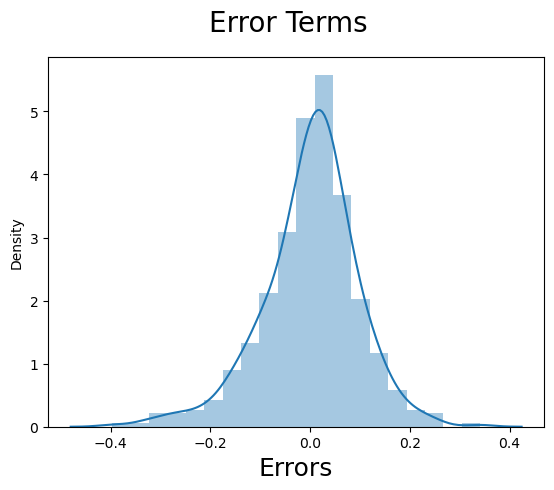

In [73]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                        

As per assumption of linear regression the error terms of our model are normally distributed

### Making Predictions

Applying the scaling on the test sets

In [74]:
# define numerical variables of test data
num_vars = ['Temp', 'Humidity', 'Wind_speed', 'Count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

##### Dividing into X_test and y_test

In [75]:
# divide the test data into x and y
y_test = df_test.pop('Count')
X_test = df_test

In [76]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [77]:
# create a fitted line
lm1 = sm.OLS(y_test,X_test_new).fit()

In [78]:
# See the parameters
lm1.params

const                           0.258458
Temp                            0.380251
Wind_speed                     -0.060182
Season_spring                  -0.188294
Year_2019                       0.245928
Month_July                     -0.050388
Week_day_Mon                    0.038168
Week_day_Sun                    0.020026
Weather_Situation_Light Snow   -0.197729
dtype: float64

In [79]:
# print summary for the test data
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     102.1
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           4.37e-68
Time:                        23:16:44   Log-Likelihood:                 196.70
No. Observations:                 219   AIC:                            -375.4
Df Residuals:                     210   BIC:                            -344.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2585      0.032      8.175      0.000       0.196       0.321
Temp                             0.3803      0.044      8.659      0.000       0.294       0.467
Wind_speed                      -0.0602      0.045     -1.348      0.179      -0.148       0.028
Season_spring                   -0.1883      0.021     -8.823      0.000      -0.230      -0.146
Year_2019                        0.2459      0.014     17.838      0.000       0.219       0.273
Month_July                      -0.0504      0.026     -1.966      0.051      -0.101       0.000
Week_day_Mon                     0.0382      0.019      1.970      0.050      -2e-05       0.076
Week_day_Sun                     0.0200      0.018      1.084      0.280      -0.016       0.056
Weather_Situation_Light Snow    -0.1977      0.043     -4.548      0.000      -0.283      -0.112
==============================================================================
Omnibus:                       22.771   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.907
Skew:                          -0.772   Prob(JB):                     1.44e-06
Kurtosis:                       3.751   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Making predictions
y_pred = lm1.predict(X_test_new)

In [81]:
# See values for y_pred
y_pred

184    0.519289
535    0.837875
299    0.453045
221    0.573261
152    0.556900
         ...   
400    0.396733
702    0.684769
127    0.476589
640    0.784764
72     0.183997
Length: 219, dtype: float64

### Model Evaluation¶ 

Text(0, 0.5, 'y_pred')

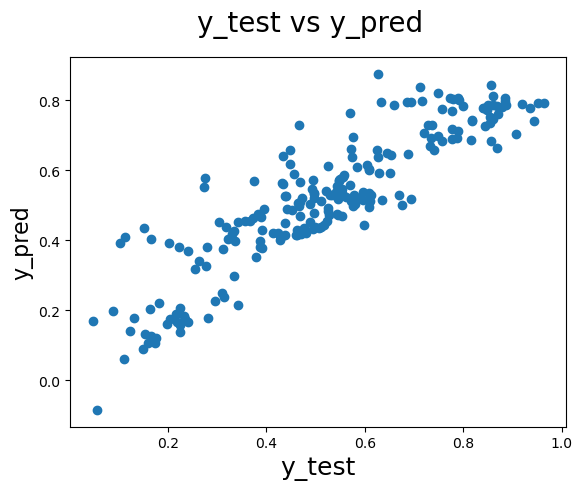

In [83]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

#### R-squared score on the test set

In [84]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7954865630570845

### Final Results

#### For the Train data:
- R-squared value = 0.816
- Adjusted R-squared =  0.812
#### For the Test data:
- R-squared value = 0.795
- Adjusted R-squared value = 0.788
#### r2_score :
- 0.79


In this case the train R-squared value is 0.816, which means that 81.6% of the variance in the dependent variable is predictable from the independent variable(s) in the training dataset . The train adjusted R-squared value is 0.812, which is a modified version of the R-squared value that adjusts for the number of independent variables in the model. 

The test R-squared value is 0.795, which means that 79.5% of the variance in the dependent variable is predictable from the independent variable(s) in the test dataset. The test adjusted R-squared value is 0.788, which is a modified version of the R-squared value that adjusts for the number of independent variables in the model.

In summary, the model has a high R-squared value for both the training and test datasets, indicating that it fits the data well and can make accurate predictions. However, it is important to consider other factors before drawing any conclusions about the model’s performance.